# Q1: matrix multiplication

Test the matrix multiplication function in the course notebook. For both direct implement and vectorized implement, plot how the calculation time increase with matrix size N. Can you manually fit a $cN^3$ curve to the calculation time? What's the value of c for the direct implement and vectorized implement?

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

import warnings
warnings.filterwarnings("ignore")

In [4]:
Nmax = 100
direct_time = []
vectorize_time = []
for N in range(3,Nmax+1):
    A = np.random.rand(N,N)
    B = np.random.rand(N,N)
    C = np.zeros((N,N))

    # direct implement
    tic = time()
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i,j] += A[i,k]*B[k,j]
    toc = time()
    direct_time.append(toc-tic)

    # vectorization
    tic = time()
    for i in range(N):
        for j in range(N):
            C[i,j] = np.sum(A[i,:]*B[:,j])
    toc = time()
    vectorize_time.append(toc-tic)

direct implement, the value of c: 6.230031724296103e-07
vectorirzed implement, the value of c: 6.056204210022933e-08


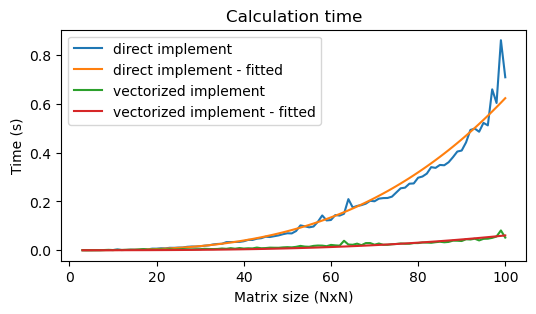

In [5]:
N = [x for x in range(3, Nmax+1)]
N = np.array(N)
from scipy.optimize import curve_fit
def cubic_model(N, c):
    return c * N**3

c_direct_time, _ = curve_fit(cubic_model, N, direct_time)
print("direct implement, the value of c: {}".format(c_direct_time[0]))
c_vectorize, _ = curve_fit(cubic_model, N, vectorize_time)
print("vectorirzed implement, the value of c: {}".format(c_vectorize[0]))
direct_time_fit = cubic_model(N, c_direct_time)
vectorize_time_fit = cubic_model(N, c_vectorize)
plt.figure(figsize=(6,3))
plt.plot(N, direct_time,label='direct implement')
plt.plot(N,direct_time_fit,label='direct implement - fitted')
plt.plot(N, vectorize_time,label='vectorized implement')
plt.plot(N,vectorize_time_fit,label='vectorized implement - fitted')
plt.title("Calculation time")
plt.xlabel("Matrix size (NxN)")
plt.ylabel("Time (s)")
plt.legend();

# Q2: banded matrix

Write a program to solve the problem $Ax=y$ using Gaussian Elimination, where $A$ is a banded square matrix with form:
$$ A= \left[\begin{matrix}
b&c&0&0&...&0\\
a&b&c&0&...&0\\
0&a&b&c&...&0\\
\vdots & \vdots &\vdots &\vdots &\vdots &\vdots \\
0&0&0&0&...&b
\end{matrix}\right]
$$
test the program using randomly generated matrix. Plot how computation time increase with matrix size N. What's the computational cost here?

In [318]:
def tridiagonal(a,b,c,d):
    """
    a, b, c are matrices for tridiagonal elements
    d is rhs matrix
    """
    n = len(d)
    c1 = np.zeros(n-1)
    d1 = np.zeros(n)
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1, n-1):
        c1[i] = c[i]/(b[i]-a[i]*c1[i-1])
    for i in range(1, n):
        d1[i] = (d[i] - a[i]*d1[i-1])/(b[i] - a[i]*c1[i-1])
    for i in reversed(range(n-1)):
        d1[i] = d1[i] - c1[i]*d1[i+1]
    return d1

n = 3
a_ = 1; b_ = 2; c_ = 1.5
a = np.ones(n)  * a_
b = np.ones(n)  * b_
c = np.ones(n-1)* c_
d = np.array([5,2,3])
x = tridiagonal(a,b,c,d)
for i in range(n):
    print("x_%d: %16.5f" %(i+1, x[i]))
#checking
A = np.array([[2, 1.5, 0], [1, 2, 1.5], [0,1,2]])
b = np.array([5,2,3])
xy = np.linalg.solve(A, b)
for i in range(n):
    print("x_builtin_%d: %8.5f" %(i+1, xy[i]))

x_1:          6.62500
x_2:         -5.50000
x_3:          4.25000
x_builtin_1:  6.62500
x_builtin_2: -5.50000
x_builtin_3:  4.25000


In [360]:
timex = []
nmax = 1000
for n in range(3, nmax+1):
    a = np.ones(n)      * np.random.random()
    b = np.ones(n)      * np.random.random()
    c = np.ones(n-1)    * np.random.random()
    d = np.random.random((n,1))
    tic = time()
    x = tridiagonal(a,b,c,d)
    toc = time()
    timex.append(toc-tic)

The complexity is $\mathcal{O}(n)$

direct implement, the value of c: 3.57855135736064e-06


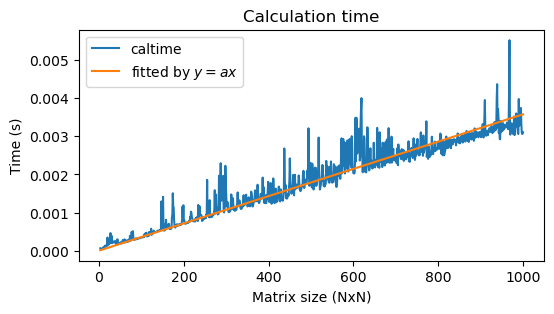

In [370]:
from scipy.optimize import curve_fit
n = [x for x in range(3, nmax+1)]
def cubic_model(n, c):
    return c * n

c_timex, _ = curve_fit(cubic_model, n, timex)
timex_fit = cubic_model(n, c_timex)
plt.figure(figsize=(6,3))
plt.plot(n, timex, label = 'caltime')
plt.plot(n, timex_fit, label = 'fitted by $y = ax$')
plt.title("Calculation time")
plt.xlabel("Matrix size (NxN)")
plt.ylabel("Time (s)")
plt.legend();

# Q3: Implement LU-Factorization in Python
Write separate functions for LU factorization and for back/forward substitution.
Verify your results with Python package.

In [305]:
def luDecomp(A):
    n = A.shape[0]
    U = np.zeros((n, n))
    L = np.eye(n)
    for k in range(n):
        U[k, k:] = A[k, k:] - L[k,:k] @ U[:k,k:]
        L[(k+1):,k] = (A[(k+1):,k] - L[(k+1):,:] @ U[:,k]) / U[k, k]
    return L, U

def forward_substitution(L, b):
    n = L.shape[0]
    y = np.zeros_like(b);
    y[0] = b[0] / L[0, 0]
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
    return y

def back_substitution(U, y):
    n = U.shape[0]
    x = np.zeros_like(y);
    x[-1] = y[-1] / U[-1, -1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
    return x

def luSolve(A, b):
    L, U = luDecomp(A)
    y = forward_substitution(L, b)
    print(y)
    return back_substitution(U, y)
n = 3
# A = np.random.random((n,n))
# b = np.random.random((n,1))
A = np.array([[1, 4, 5], [6, 8, 22], [32, 5., 5]])
b = np.array([1, 2, 3.])
x = luSolve(A, b)
for i in range(n):
    print("x_%d: %16.5f" %(i+1, x[i]))

# check results by built-in function:
xy = np.linalg.solve(A, b)
for i in range(n):
    print("x_builtin_%d: %8.5f" %(i+1, xy[i]))

[ 1.   -4.    1.75]
x_1:          0.05615
x_2:          0.25936
x_3:         -0.01872
x_builtin_1:  0.05615
x_builtin_2:  0.25936
x_builtin_3: -0.01872


# Q4: Convert LU-Factorization code to C (GPGN536 Only)

Convert the LU-factorization code to C. Use python code to verify the result. Compare the computation performance between C and python.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>

float** allocate2DArray(int rows, int cols) {
    /*
    float** a = allocate2DArray(r,c);
    */
    float** matrix = (float**)malloc(rows * sizeof(float*));
    if (matrix == NULL) {
        perror("Memory allocation failed");
        exit(1); 
    }
    for (int i = 0; i < rows; i++) {
        matrix[i] = (float*)malloc(cols * sizeof(float));
        if (matrix[i] == NULL) {
            perror("Memory allocation failed");
            exit(1); 
        }
        for (int j = 0; j < cols; j++){
            matrix[i][j] = 0.0;
        }   
    }
    return matrix;
}

void print1DMatrix(float *a, int n){
    for (int i = 0; i < n; i++) { 
        printf("%f\n", a[i]);

    }
}

void print2DMatrix(float **a, int n){
    for (int i = 0; i < n; i++) { 
        for (int j = 0; j < n; j++) {
            printf("%f\t", a[i][j]);
        }
        printf("\n"); 
    }
}


void random2DArray(float** a, int n){
    srand(time(NULL));
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            a[i][j] = (float)rand() / RAND_MAX;
}

void random1DArray(float* a, int n){
    srand(time(NULL));
    for (int i = 0; i < n; i++){
        a[i] = (float)rand() / RAND_MAX;
    }
}

void luDecomp(float** a, float** l, float** u, int n) {
    for (int i = 0; i < n; i++){
        l[i][i] = 1.0;
    }
    for (int k = 0; k < n; k++) {

        for (int j = k; j < n; j++) {
            float sum = 0.0;
            for (int m = 0; m < k; m++) {
                sum += l[k][m] * u[m][j];
            }
            u[k][j] = a[k][j] - sum;
        }
        for (int i = k + 1; i < n; i++) {
            float sum = 0.0;
            for (int m = 0; m < k; m++) {
                sum += l[i][m] * u[m][k];
            }
            l[i][k] = (1.0 / u[k][k]) * (a[i][k] - sum);
        }
    }
}

void forwardSubstitution(float** l, float* b, float* y, int n) {
    
    y[0] = b[0] / l[0][0];
    for (int i = 1; i < n; i++) {
        float sum = 0.0;
        for (int j = 0; j < i; j++) {
            sum += l[i][j] * y[j];
        }
        y[i] = (1.0 / l[i][i]) * (b[i] - sum);
    }
}

void backwardSubstitution(float** u, float* y, float* x, int n) {
    x[n-1] = y[n-1]/u[n-1][n-1];
    for (int i = n - 2; i >= 0; i--) {
        float sum = 0.0;
        for (int j = i + 1; j < n; j++) {
            sum += u[i][j] * x[j];
        }
        x[i] = (1.0 / u[i][i]) * (y[i] - sum);
    }
}

int main(){
    int n = 3;
    float** a = allocate2DArray(n,n);
    float*  b = (float*)malloc(n * sizeof(float));
    float*  y = (float*)malloc(n * sizeof(float));
    float*  x = (float*)malloc(n * sizeof(float));
    // random2DArray(a, n);
    // random1DArray(b, n);

    float values[3][3] = {
        {1.0, 4.0, 5.0},
        {6.0, 8.0, 22.0},
        {32.0, 5.0, 5.0}
    };

    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            a[i][j] = values[i][j];
        }
    }
    float bvalues[] = {1.0, 2.0, 3.0};
    for (int i = 0; i < n; i++) {
        b[i] = bvalues[i];
    }
    float** l = allocate2DArray(n,n);
    float** u = allocate2DArray(n,n);
    luDecomp(a, l, u, n);
    forwardSubstitution(l, b, y, n);
    backwardSubstitution(u, y, x, n);
    print1DMatrix(x,n);
}